# Qiskit state visualization

In [1]:

import qiskit
print(dir(qiskit), '\n')
print(qiskit.__version__)


['AncillaRegister', 'ClassicalRegister', 'MissingOptionalLibraryError', 'QiskitError', 'QuantumCircuit', 'QuantumRegister', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_accelerate', '_config', '_numpy_compat', '_user_config', 'assemble', 'assembler', 'circuit', 'compiler', 'converters', 'dagcircuit', 'exceptions', 'generate_preset_pass_manager', 'importlib', 'os', 'passmanager', 'providers', 'pulse', 'qiskit', 'qobj', 'quantum_info', 'result', 'schedule', 'scheduler', 'sequence', 'synthesis', 'sys', 'transpile', 'transpiler', 'user_config', 'utils', 'version', 'warnings'] 

1.2.4


In [2]:

import qiskit_aer
print(dir(qiskit_aer), '\n')
print(qiskit_aer.__version__)


['Aer', 'AerError', 'AerJob', 'AerProvider', 'AerSimulator', 'QasmSimulator', 'StatevectorSimulator', 'UnitarySimulator', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'aer_compiler', 'aer_simulator', 'aerbackend', 'aererror', 'aerprovider', 'backend_utils', 'backendconfiguration', 'backendproperties', 'backends', 'compatibility', 'controller_wrappers', 'jobs', 'library', 'name_mapping', 'noise', 'platform', 'qasm_simulator', 'quantum_info', 'statevector_simulator', 'sys', 'unitary_simulator', 'utils', 'version', 'warnings'] 

0.15.1


__Drawing a Bell state $\ket{\Psi^+}$ producing circuit__ 

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


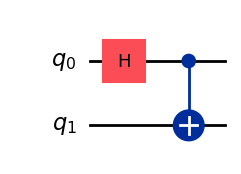

In [8]:

from qiskit import QuantumCircuit
#from IPython.display import display, Latex, Markdown
import matplotlib.pyplot as plt

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

print(qc.draw(output='text'))
qc.draw(output='mpl')


__Making + Measuring the output__

Measurements are done from the end of the branches

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


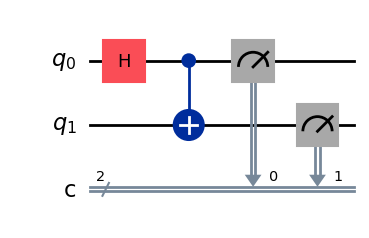

In [12]:

qc_measure = QuantumCircuit(2, 2)

qc_measure.h(0)
qc_measure.cx(0,1)

qc_measure.measure([0, 1], [0, 1])

print(qc_measure.draw(output='text'))
qc_measure.draw(output='mpl', figsize=)


In [14]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

print(qc.draw(output='text'))
circuit_drawer(qc, output='latex', scale=0.7)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


MissingOptionalLibraryError: "The 'pdflatex' library is required to use 'LaTeX circuit drawing'.  You will likely need to install a full LaTeX distribution for your system."

In [ ]:

from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]


In [ ]:

import numpy as np
import matplotlib
from qiskit.visualization import plot_bloch_vector

state_cartesian = [0, 0, 1]

plot_bloch_vector(state_cartesian, figsize=(3, 3))


In [ ]:
qiskit.__version__

In [ ]:

import numpy 
import matplotlib.pyplot as plt
import pylatexenc
from qutip import (about, basis, propagator, qeye, qpt, qpt_plot_combined, 
                   sigmam, sigmax, sigmay, sigmaz, spost, spre, tensor)
from qiskit import QuantumCircuit


__Visualize a single state vector in the bloch sphere__


__Plot multiple vectors in Bloch sphere for each qubit in a circuit__


In [ ]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

# Create a 4-qubit quantum circuit
qc = QuantumCircuit(4)

figures = []  

# Initial state plot
state = Statevector(qc)
figures.append(plot_bloch_multivector(state, figsize=(10,10))) 

qc.h(0)
qc.x(1)
qc.y(2)
qc.z(3)

state = Statevector(qc)
figures.append(plot_bloch_multivector(state, figsize=(10,10)))  

display(figures) 


__3D interactive object__

In [ ]:
import numpy as np
import plotly.graph_objects as go

bloch_vector = [0, 0, 1]  

fig = go.Figure()

# Draw the sphere's surface
u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:50j]
x = np.sin(v) * np.cos(u)
y = np.sin(v) * np.sin(u)
z = np.cos(v)

fig.add_trace(go.Surface(x=x, y=y, z=z, opacity=0.3, colorscale='Blues'))

# Add the Bloch vector
fig.add_trace(go.Scatter3d(
    x=[0, bloch_vector[0]],
    y=[0, bloch_vector[1]],
    z=[0, bloch_vector[2]],
    marker=dict(size=4, color='red'),
    line=dict(color='red', width=5),
    name='Bloch Vector'
))

# Update layout for better visualization
fig.update_layout(
    title="Interactive Bloch Sphere",
    scene=dict(
        xaxis=dict(nticks=8, range=[-1, 1]),
        yaxis=dict(nticks=8, range=[-1, 1]),
        zaxis=dict(nticks=8, range=[-1, 1]),
    ),
    margin=dict(r=20, l=10, b=10, t=10)
)

# Display the interactive Bloch sphere
fig.show()

# Save the interactive plot as HTML
fig.write_html("interactive_bloch_sphere.html")



In [ ]:
%matplotlib ipyml

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Apply some gates
qc.h(0)
qc.x(1)

# Generate the statevector
state = Statevector(qc)

# Plot the Bloch multivector interactively
fig = plot_bloch_multivector(state)
plt.show()

__SWAP Gate__

The SWAP gate simply swaps the two qubits:

`SWAP` $\ket{00} = \ket{00}$ <br>
`SWAP` $\ket{01} = \ket{10}$ <br>
`SWAP` $\ket{10} = \ket{01}$ <br>
`SWAP` $\ket{11} = \ket{11}$ <br>

STEP:
1. Learn how to create $\ket{00}$ in `QuTip` and `Qiskit`.
2. Learn to draw it.
3. Apply the `SWAP` gate on different states

__1. Create $\ket{00}$ in `Qiskit`__   
You can see the corresponding circuit, position of qubits in bloch sphere

In [ ]:

%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
#======================================================

qc    = QuantumCircuit(2)
state = Statevector.from_int(0, dims=[2, 2])
